# Загрузка Данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import shap

import warnings
warnings.filterwarnings("ignore")

**Customer ID:** Уникальный идентификатор клиента.

**Surname:** Фамилия клиента.

**Credit Score:** Числовое значение, отражающее кредитоспособность клиента.

**Geography:** Страна, в которой проживает клиент.

**Gender:** Пол клиента.

**Age:** Возраст клиента (числовое значение).

**Tenure:** Количество лет, в течение которых клиент пользуется услугами банка.

**Balance:** Баланс на счете клиента.

**NumOfProducts:** Количество банковских продуктов, используемых клиентом (например, сберегательный счет, кредитная карта).

**HasCrCard:** Наличие у клиента кредитной карты (бинарный признак: да/нет).

**IsActiveMember:** Активность клиента (бинарный признак: да/нет, например, использование услуг, вход в аккаунт).

**EstimatedSalary:** Примерная заработная плата клиента.

**Exited:** Флаг оттока клиента (Целевая переменная: 1 — клиент ушел, 0 — остался).

In [2]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [3]:
data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3519,661,Spain,Female,41,5,28082.95,1,1,0,69586.27,1
3349,665,Germany,Female,45,5,155447.65,2,1,0,51871.95,1
2816,683,France,Male,25,4,0.00,2,1,0,152698.24,0
8042,606,France,Male,37,6,82373.94,1,0,0,172526.90,1
1237,717,France,Male,42,5,0.00,2,1,0,172665.21,0
4330,781,France,Female,19,3,0.00,2,1,1,124297.32,0
5998,644,Spain,Male,28,0,0.00,2,1,0,119419.37,0
2274,580,France,Female,65,9,106804.26,3,1,0,107890.69,1
2137,850,France,Female,38,1,106871.81,2,1,0,29333.01,0
9429,651,France,Female,32,8,144581.96,1,1,1,87609.50,0


In [4]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [7]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

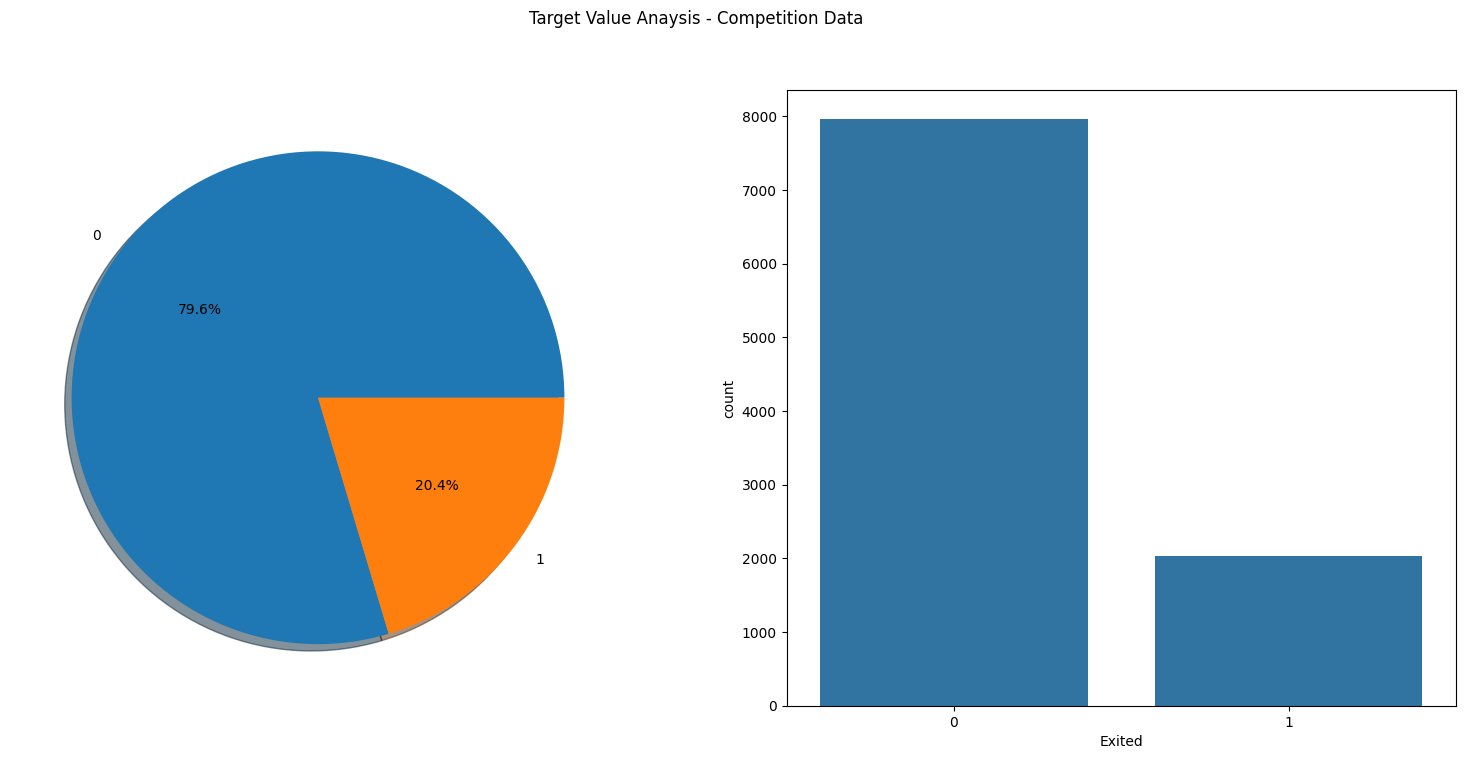

In [8]:
f,ax=plt.subplots(1,2,figsize=(19,8))
data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=data,ax=ax[1])
# ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Competition Data')
plt.show()

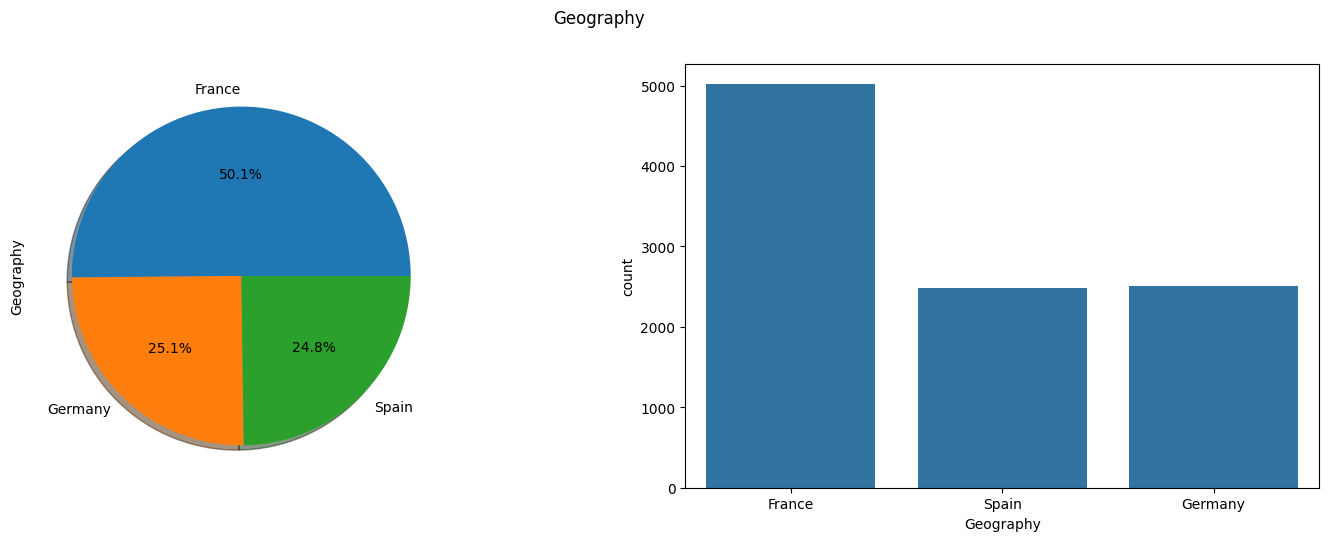

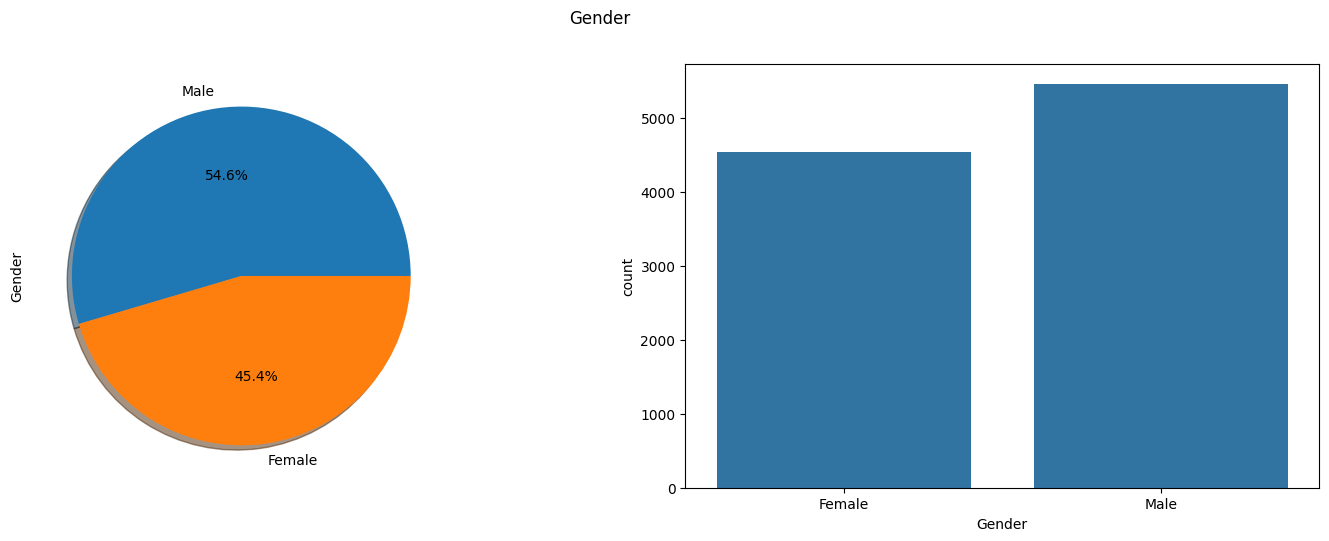

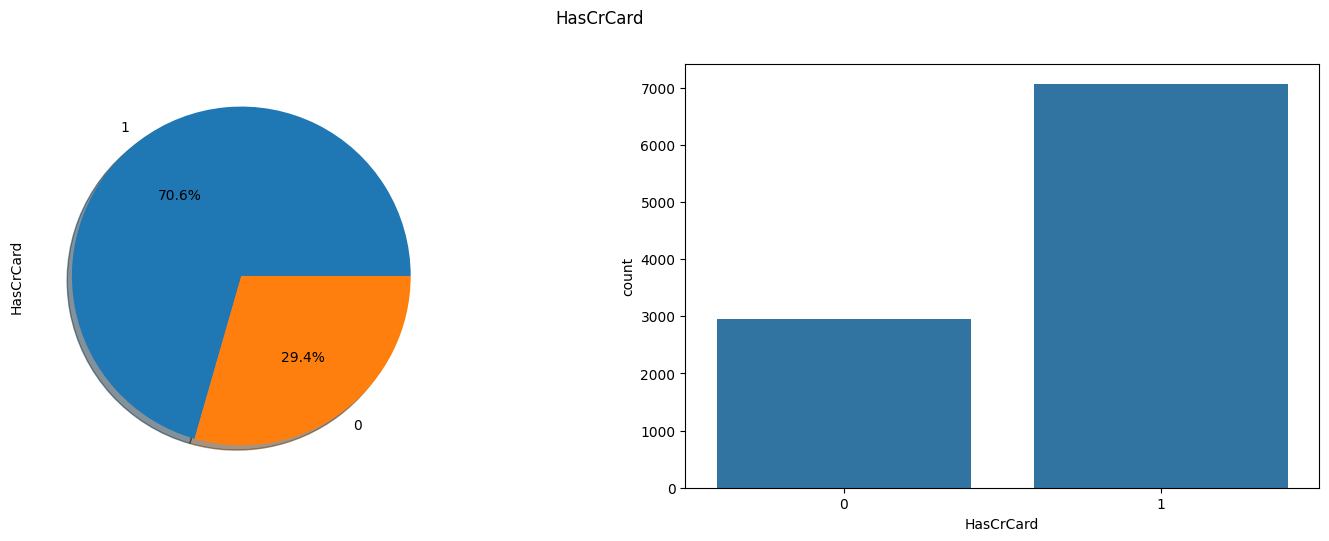

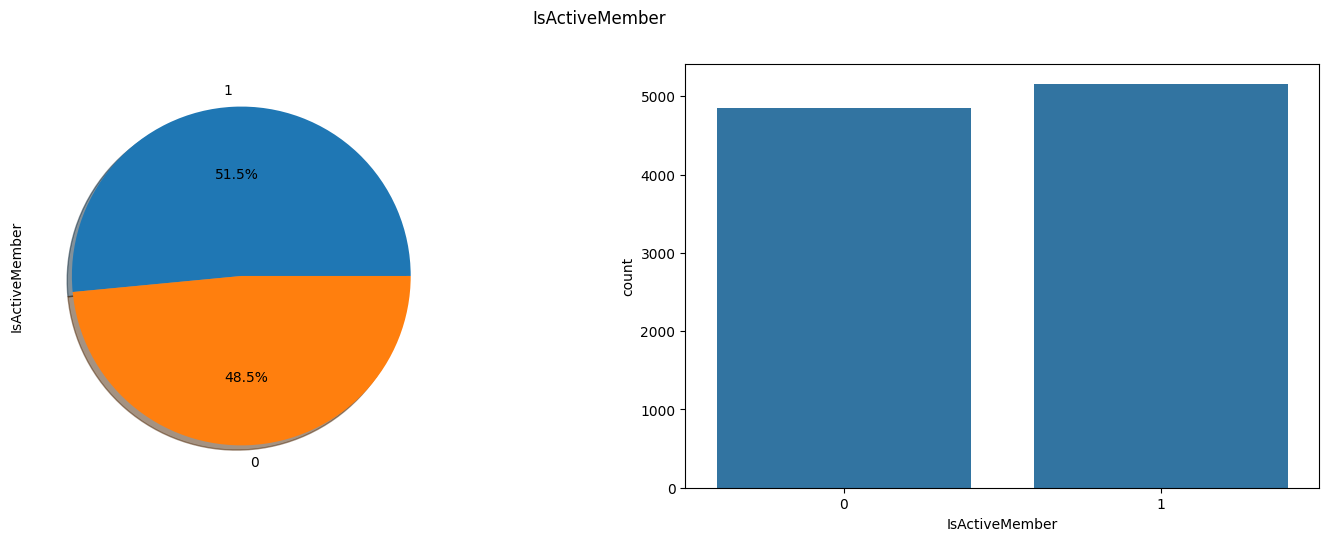

In [9]:
for column in categorical_features:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=data,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

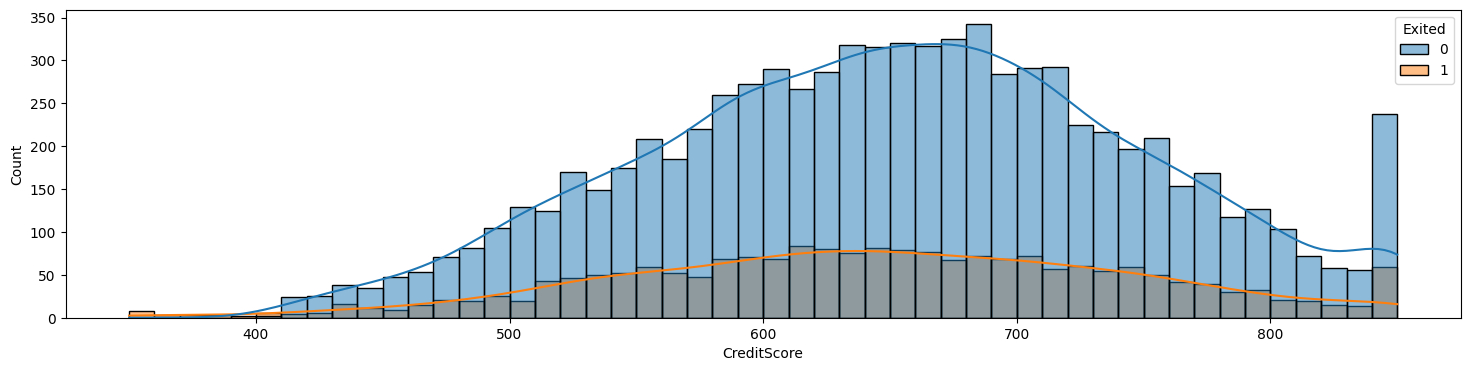

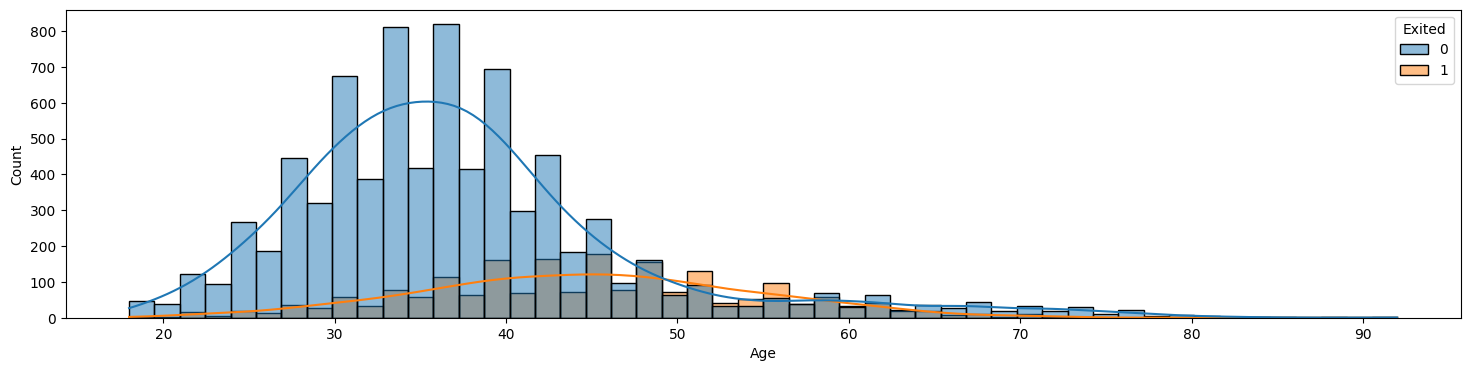

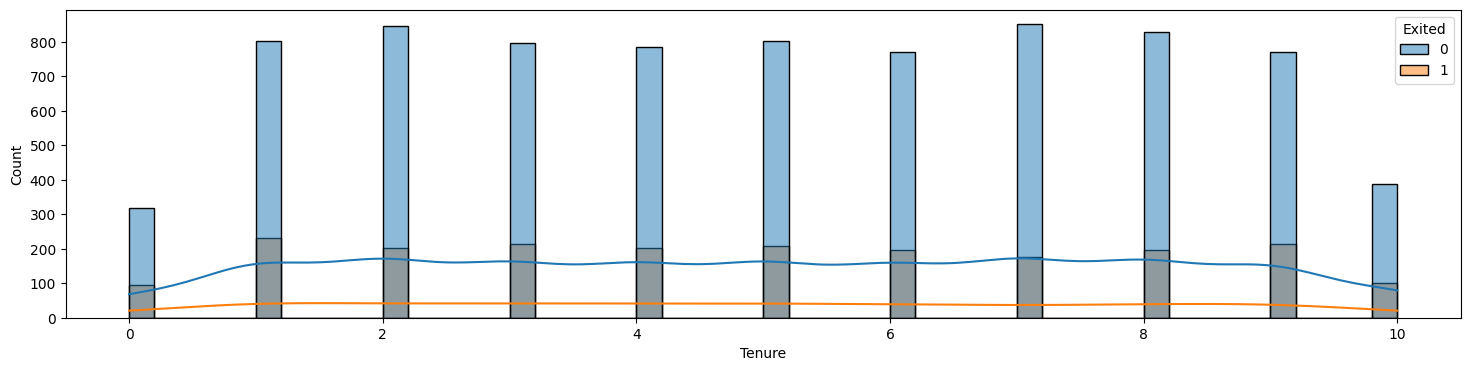

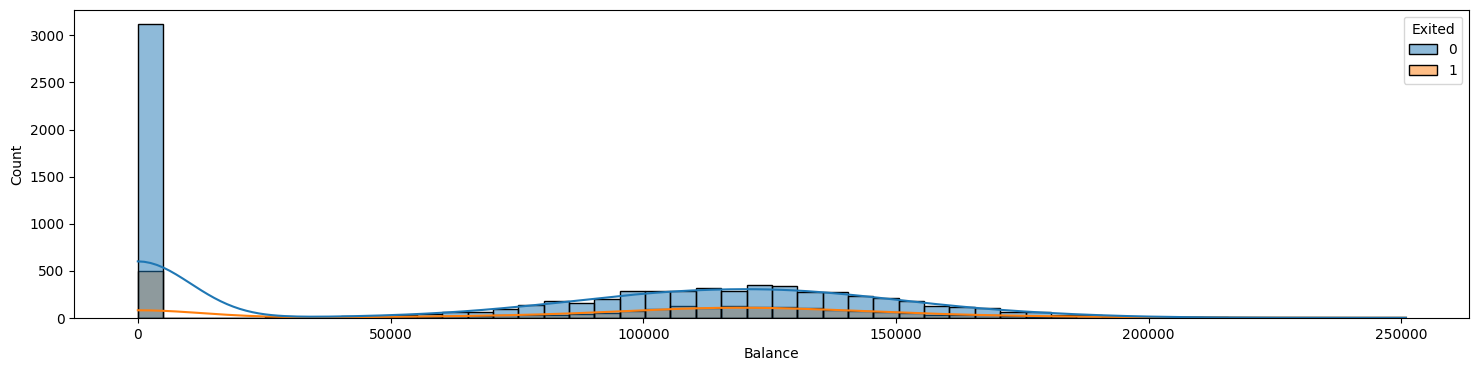

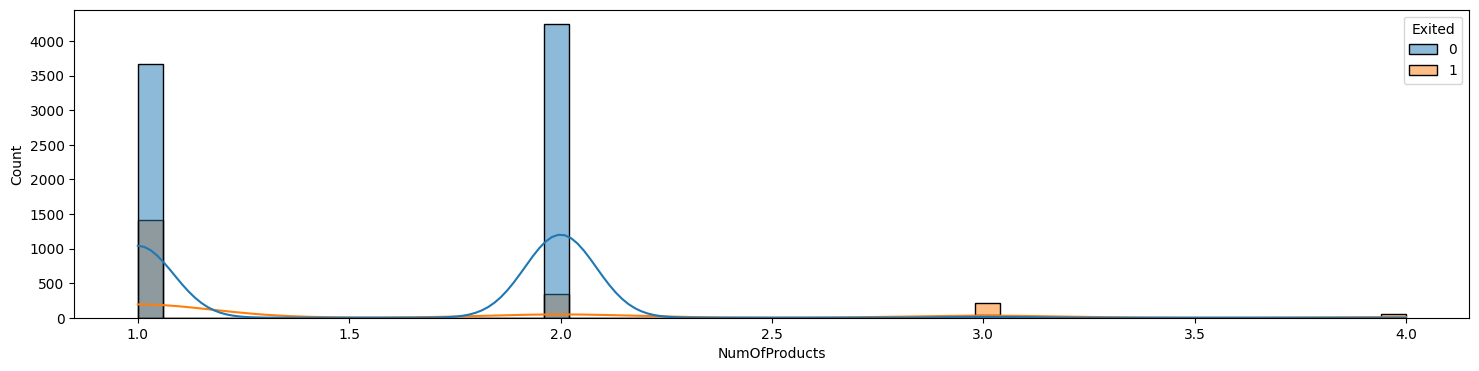

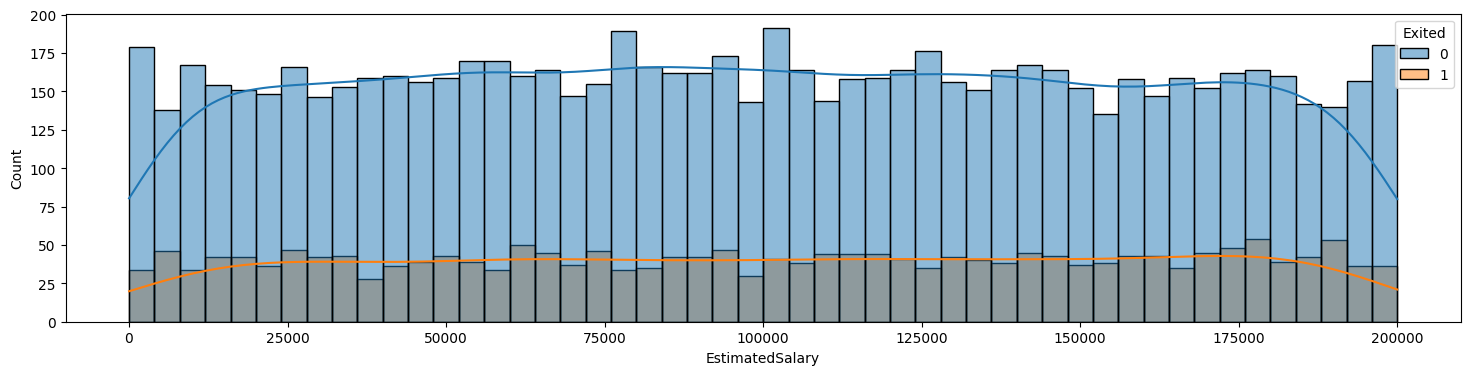

In [10]:
for column in numerical_features:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

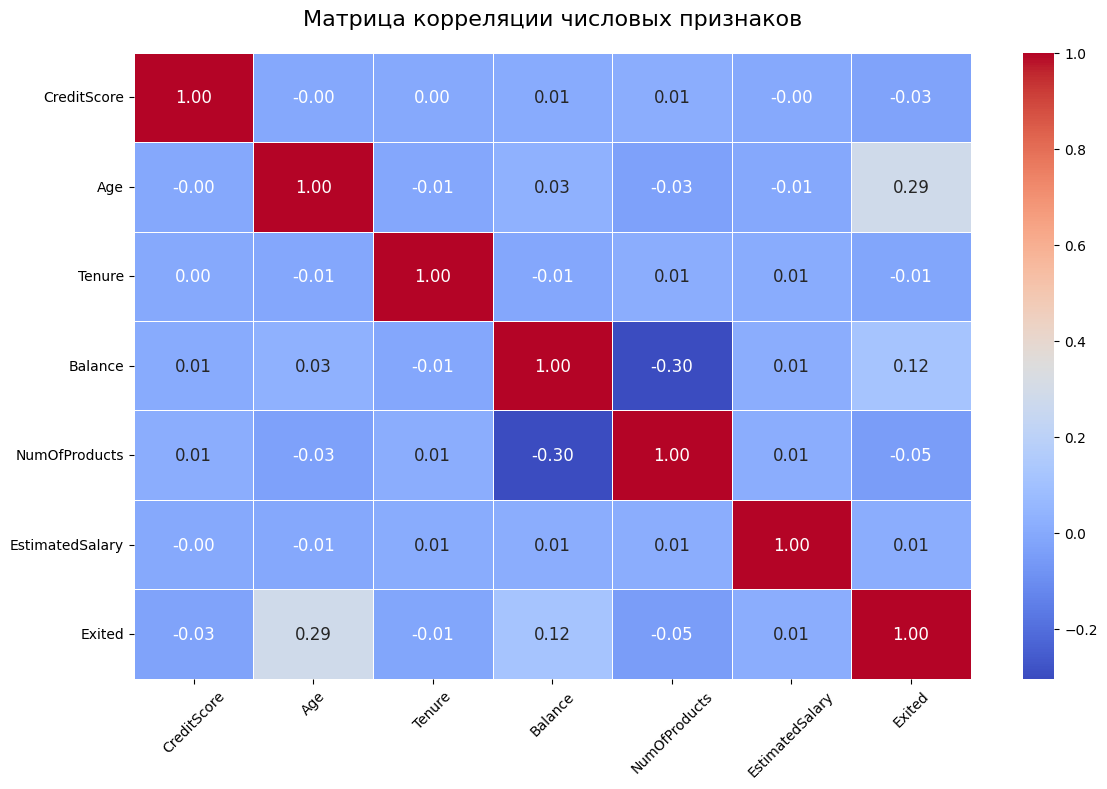

In [11]:
numerical_features.append("Exited")
corr_matrix = data[numerical_features].corr()

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
           annot=True,
           fmt=".2f",
           cmap='coolwarm',
           linewidths=0.5,
           annot_kws={"size": 12})
plt.title('Матрица корреляции числовых признаков', pad=20, fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
!pip install shap catboost xgboost


[CATBOOST]
→ Используется GPU.


Default metric period is 5 because AUC is/are not implemented for GPU


Лучшие параметры: {'depth': 6, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Лучший AUC на кросс-валидации: 0.8690
Тестовый AUC: 0.8765
Время обучения: 536.47 сек.
→ SHAP-анализ...


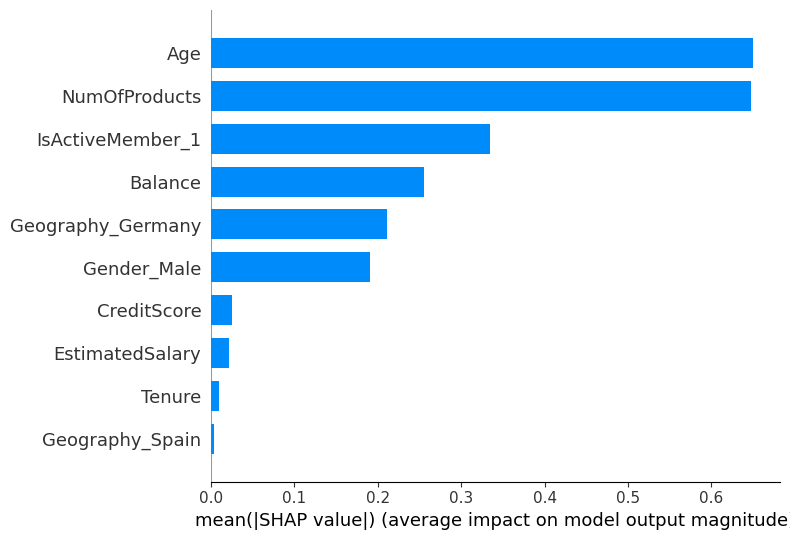


[XGBOOST]
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'reg_lambda': 3}
Лучший AUC на кросс-валидации: 0.8615
Тестовый AUC: 0.8633
Время обучения: 49.35 сек.
→ SHAP-анализ...


Random Search: 100%|██████████| 30/30 [13:30<00:00, 27.01s/it]


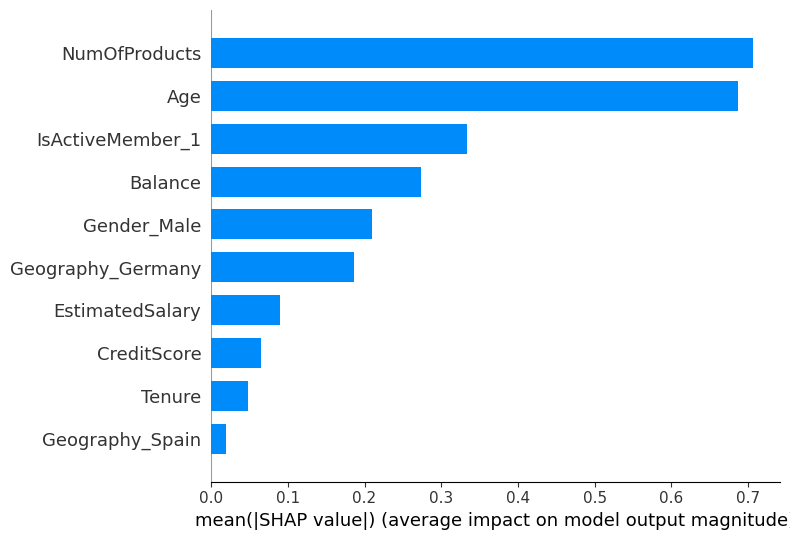


[RANDOM FOREST]
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Лучший AUC на кросс-валидации: 0.8605
Тестовый AUC: 0.8647
Время обучения: 100.90 сек.
→ SHAP-анализ...


 98%|===================| 197/200 [00:11<00:00]       

<Figure size 640x480 with 0 Axes>

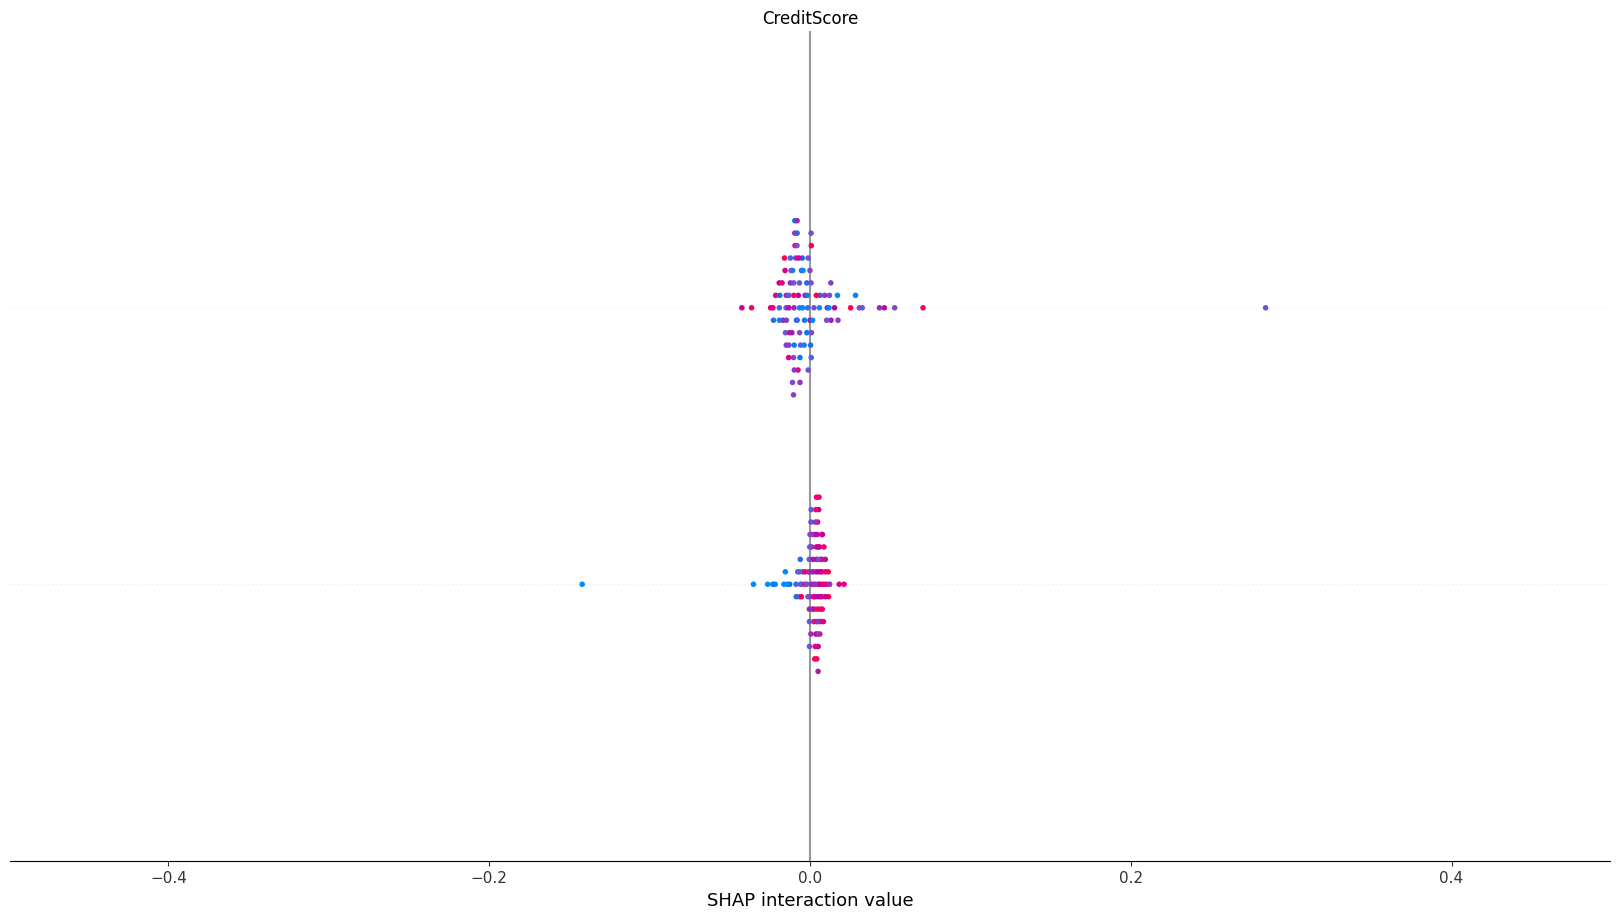

In [24]:
import pandas as pd
import shap
import time
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

def prepare_data(data, cat_features, target='Exited'):
    X = data.drop(target, axis=1)
    y = data[target]
    X = pd.get_dummies(X, columns=cat_features, drop_first=True)
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

def train_catboost(X_train, y_train, X_test, y_test):
    print("\n[CATBOOST]")
    start = time.time()

    param_grid = {
        'depth': [4, 6],
        'learning_rate': [0.01, 0.1],
        'iterations': [500],
        'l2_leaf_reg': [1, 3]
    }

    try:
        model = CatBoostClassifier(
            eval_metric='AUC',
            early_stopping_rounds=50,
            verbose=0,
            task_type='GPU'
        )
        print("→ Используется GPU.")
    except:
        model = CatBoostClassifier(
            eval_metric='AUC',
            early_stopping_rounds=50,
            verbose=0,
            task_type='CPU'
        )
        print("→ Переключение на CPU.")

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    print(f"Лучшие параметры: {grid.best_params_}")
    print(f"Лучший AUC на кросс-валидации: {grid.best_score_:.4f}")
    print(f"Тестовый AUC: {auc:.4f}")
    print(f"Время обучения: {time.time() - start:.2f} сек.")

    explain_shap(best_model, X_test, model_type='catboost')
    return best_model

def train_xgboost(X_train, y_train, X_test, y_test):
    print("\n[XGBOOST]")
    start = time.time()

    param_grid = {
        'max_depth': [4, 6],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [500],
        'reg_lambda': [1, 3]
    }

    model = XGBClassifier(
        eval_metric='auc',
        use_label_encoder=False,
        tree_method='gpu_hist',
        random_state=42
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    print(f"Лучшие параметры: {grid.best_params_}")
    print(f"Лучший AUC на кросс-валидации: {grid.best_score_:.4f}")
    print(f"Тестовый AUC: {auc:.4f}")
    print(f"Время обучения: {time.time() - start:.2f} сек.")

    explain_shap(best_model, X_test, model_type='tree')
    return best_model

def train_random_forest(X_train, y_train, X_test, y_test):
    print("\n[RANDOM FOREST]")
    start = time.time()

    param_grid = {
        'n_estimators': [100, 300],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    model = RandomForestClassifier(random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    print(f"Лучшие параметры: {grid.best_params_}")
    print(f"Лучший AUC на кросс-валидации: {grid.best_score_:.4f}")
    print(f"Тестовый AUC: {auc:.4f}")
    print(f"Время обучения: {time.time() - start:.2f} сек.")

    explain_shap(best_model, X_test, model_type='tree')
    return best_model

def explain_shap(model, X, model_type='tree', max_display=10):
    print("→ SHAP-анализ...")
    sample = X.sample(n=min(100, len(X)), random_state=42).astype(float)

    if model_type == 'catboost':
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(sample)
        shap.summary_plot(shap_values, sample, plot_type="bar", max_display=max_display)
    else:
        explainer = shap.Explainer(model, sample)
        shap_values = explainer(sample)
        shap.summary_plot(shap_values, sample, plot_type="bar", max_display=max_display)

    plt.show()

X_train, X_test, y_train, y_test = prepare_data(data, categorical_features)

catboost_model = train_catboost(X_train, y_train, X_test, y_test)
xgboost_model = train_xgboost(X_train, y_train, X_test, y_test)
rf_model = train_random_forest(X_train, y_train, X_test, y_test)